In [29]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Load your complete dataset here
data = pd.read_csv('Datasets/heartdisease.csv')

In [38]:
# Data Preprocessing
# Handle missing values
imputer = SimpleImputer(strategy='median')
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Display basic information about the dataset
print("\nFirst few rows:")
print(data.head())


First few rows:
   male   age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0   1.0  39.0        4.0            0.0         0.0     0.0              0.0   
1   0.0  46.0        2.0            0.0         0.0     0.0              0.0   
2   1.0  48.0        1.0            1.0        20.0     0.0              0.0   
3   0.0  61.0        3.0            1.0        30.0     0.0              0.0   
4   0.0  46.0        3.0            1.0        23.0     0.0              0.0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0           0.0       0.0    195.0  106.0   70.0  26.97       80.0     77.0   
1           0.0       0.0    250.0  121.0   81.0  28.73       95.0     76.0   
2           0.0       0.0    245.0  127.5   80.0  25.34       75.0     70.0   
3           1.0       0.0    225.0  150.0   95.0  28.58       65.0    103.0   
4           0.0       0.0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0         0

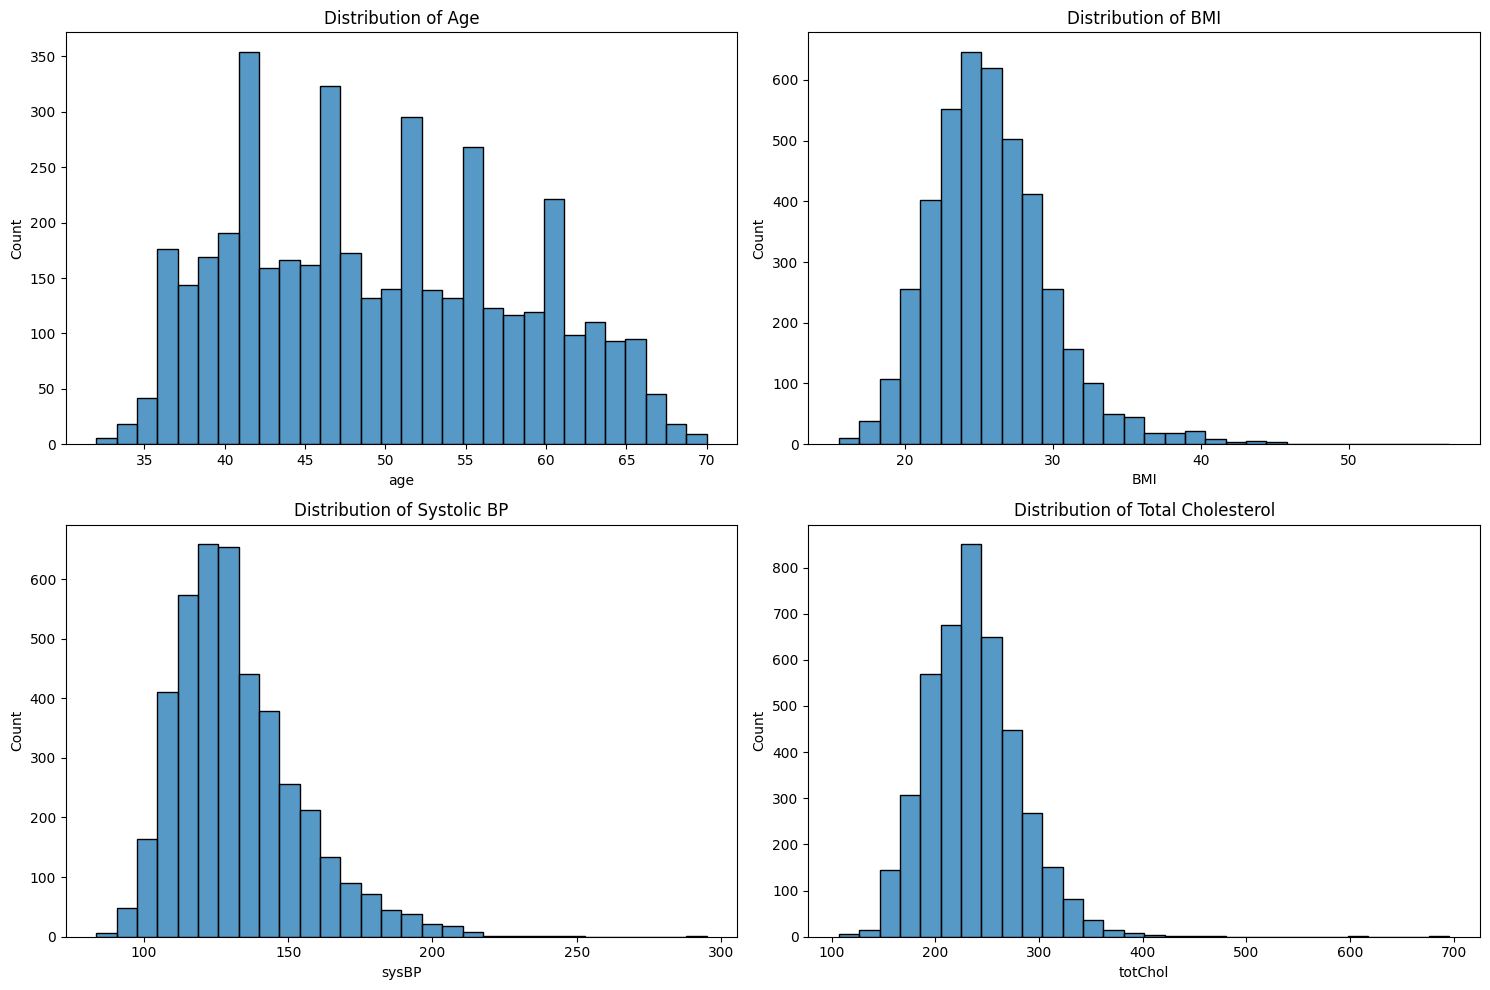

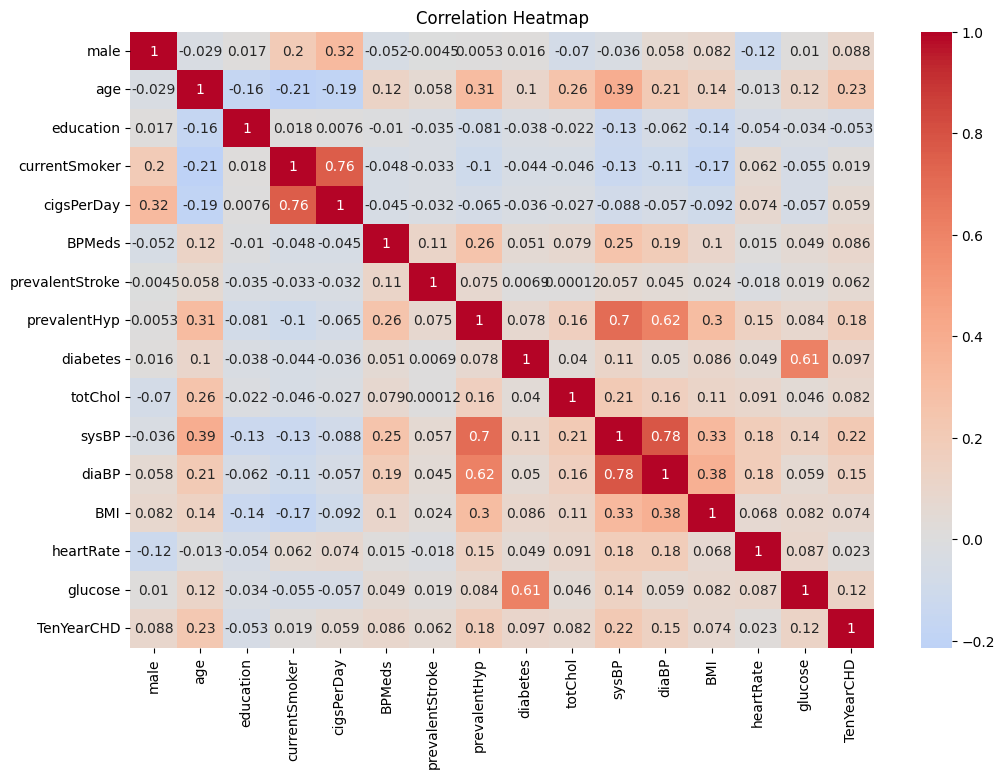

In [33]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(15, 10))

# Distribution of Age
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='age', bins=30)
plt.title('Distribution of Age')

# Distribution of BMI
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='BMI', bins=30)
plt.title('Distribution of BMI')

# Distribution of Systolic Blood Pressure
plt.subplot(2, 2, 3)
sns.histplot(data=data, x='sysBP', bins=30)
plt.title('Distribution of Systolic BP')

# Distribution of Total Cholesterol
plt.subplot(2, 2, 4)
sns.histplot(data=data, x='totChol', bins=30)
plt.title('Distribution of Total Cholesterol')

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
# Prepare data for modeling
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [35]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [36]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")


Model Accuracy: 85.73%


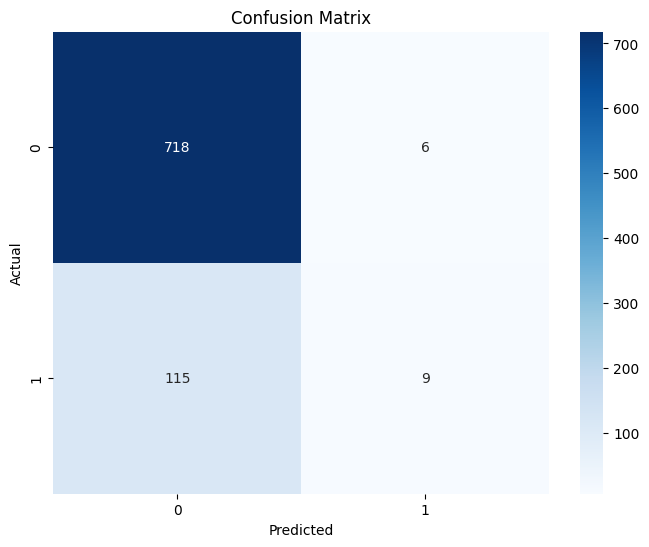


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       724
         1.0       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



In [37]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))